In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
# Read image
img = cv2.imread("nickel.jpg", cv2.IMREAD_GRAYSCALE)

In [111]:
threshold_value = 220 # Set values equal to or above 220 to 0.
max_value = 255 
_, img_th = cv2.threshold(img, threshold_value, max_value, cv2.THRESH_BINARY_INV)

In [112]:
# Copy the thresholded image.
img_floodfill = img_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
height, width = img_th.shape[:2]
mask = np.zeros((height + 2, width + 2), np.uint8)

In [113]:
# Floodfill from point (0, 0)
cv2.floodFill(img_floodfill, mask, (0,0), 255);

# Invert floodfilled image
img_floodfill_inv = cv2.bitwise_not(img_floodfill)

# Combine the two images to get the foreground.
img_out = img_th | img_floodfill_inv

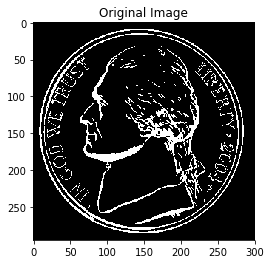

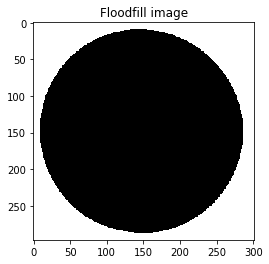

In [116]:
plt.figure(); plt.imshow(img_th, cmap='gray'); plt.title('Original Image')
plt.figure(); plt.imshow(mask, cmap='gray'); plt.title('Floodfill image')